In [417]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

$2.$ Usando el código de la clase, genere 10 esferas localizadas aleatoriamente en la mesa $A = 40 \times 40$ con velocidades aleatorias entres $-5 m/s$ y $5 m/s$. Simule $10 s$ con un paso de integración de $h = 0.001 s$ y reduzca la simulación en un factor de $200$; quitando la interacción con la pared. Conteste las siguientes preguntas exponiendo los conceptos físicos involucrados.

In [418]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)

        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.Ep = 0.
        self.VEp = np.zeros(len(t))
        
        self.L = np.zeros_like(self.R)
        #self.UK = 0 #Energía potencial
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetPotentialEnergy(i)
        self.a = self.f/self.m
        self.SetAngularMomentum(i)
        # Euler
        #self.r += self.dt*self.v
        #self.v += self.dt*self.a
        
        #self.SetPotentialEnergy(i)
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            self.Ep += (self.K*(compresion)**4)/4
            # Falta implementar energía potencial 
    # Aca debes agregar la energía potencial
    
    
    
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
    # Setter
    
    def SetAngularMomentum(self, i):
        #self.L[i] = self.r[0]*(self.m*self.v)[1]-self.r[1]*(self.m*self.v)[0]
        self.L[i] = np.cross(self.r, self.m*self.v) 
    
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    def SetPotentialEnergy(self,i):
        self.VEp[i] = self.Ep
                
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.VEp[::scale] 
    
    def GetAngularMomentum(self, scale=1):
        return self.L[::scale]
    #def GetPotentialEnergy(self,scale=1):
     #   return self.UK[::scale] 
    # Debes agregar las paredes en este punto

In [419]:
def GetParticles(N,t):
    Particles = []
    for i in range(10):
        
        Rx_aleatoria=np.random.uniform(-20.,20.)
        Ry_aleatoria=np.random.uniform(-20.,20.)
        locals()["r" + str(i)] = np.array([Rx_aleatoria,Ry_aleatoria]) #Posición
        #print(Rx_aleatoria, Ry_aleatoria )
        Vx_aleatoria=np.random.uniform(-5,5)
        Vy_aleatoria=np.random.uniform(-np.sqrt(5**2-Vx_aleatoria**2),np.sqrt(5**2-Vx_aleatoria**2))
        locals()["v" + str(i)] = np.array([Vx_aleatoria,Vy_aleatoria]) #Velocidad
        
        locals()["a" + str(i)] = np.array([0.,0.]) #Aceleración
       
        locals()["p" + str(i)] = Particle(locals()["r" + str(i)],
                                          locals()["v" + str(i)],
                                          locals()["a" + str(i)],
                                          t,m=1,radius=2,Id=i) #Partículas
        Particles.append(locals()["p" + str(i)])
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [420]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(10,t)

In [421]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            #if (Particles[i].r[0]-Particles[i].radius)<=(-40.) or (Particles[i].r[0]+Particles[i].radius)>=40.:
                #Particles[i].v[0]*=-1
            #if (Particles[i].r[1]-Particles[i].radius)<=(-40.) or (Particles[i].r[1]+Particles[i].radius)>=40.:
                #Particles[i].v[1]*=-1
                
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [422]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1095.17 Steps/s]


In [423]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


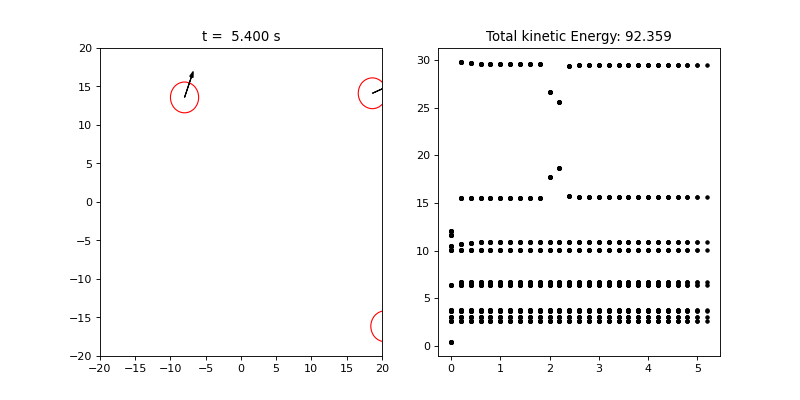

In [424]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
#ax2 = fig.add_subplot(133)
def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

$a)$ Grafique el momento lineal total en $x$ $(p_x)$ en función del tiempo. ¿Se debería conservar?

In [425]:
MomentumT = Particles[0].GetMomentum(scale)

In [426]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))

<IPython.core.display.Javascript object>


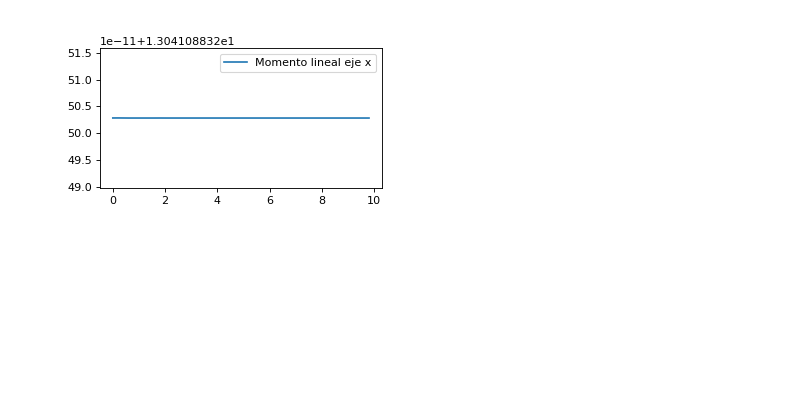

In [427]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='Momento lineal eje x')
ax3.legend()

Si se conserva el momento lineal en $x$, ya que se aplican fuerzas elásticas iguales pero en dirección opuesta entre las esferas cuando se chocan entre sí. Además, no hay ninguna otra fuerza que intervenga.

$b)$ Grafique el momento lineal total en $y$ $(p_y)$ en función del tiempo. ¿Se debería conservar?

<IPython.core.display.Javascript object>


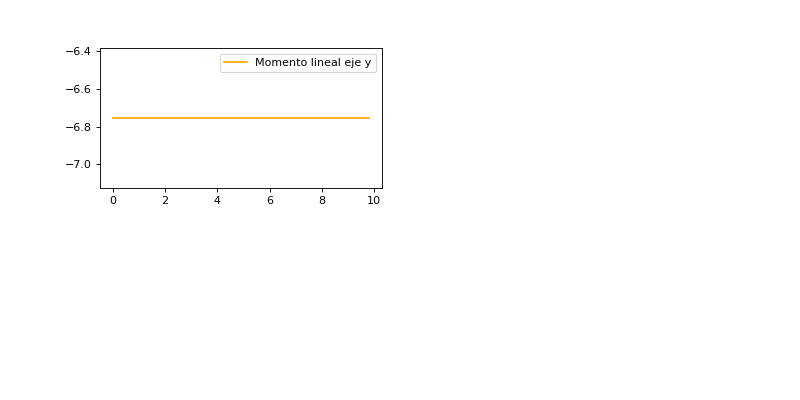

In [428]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(221)
ax4.plot(t1,MomentumT[:,1],label='Momento lineal eje y', color='orange')
ax4.legend()

Si se conserva el momento lineal en $y$, ya que se aplican fuerzas elásticas iguales pero en dirección opuesta entre las esferas cuando se chocan entre sí. Además, no hay ninguna otra fuerza que intervenga.

$c)$ Teóricamente muestre que la fuerza de contacto es conservativa. Encuentre la energía potencial.

Tomando la fuerza de contacto como: $$F=-kx**3$$

Y sabiendo que una fuerza conservativa se define como  $$F=-\nabla U$$

Sin emabargo, se puede integrar y multiplicar por $-1$ a ambos lados, para así obtener la energía potencial. $$-\int F dx =\int\nabla U dx = \Delta U$$

Por lo tanto, la energía potencial sería igual a: $$\Delta U = -\int k x^{3} dx$$

$$\Delta U = -\frac{1}{4} k(\Delta x)^{4}$$

Dado que se hizo la antiderivada del gradiente de la energía potencial y la fuerza de contacto, y da un resultado diferente de $0$, implica que existe su derivada. Además, como se muestra, dependen únicamente, de la posición inicial y final. Por lo tanto, la fuerza de contacto es conservativa.

$d)$ Grafique la energía cinética total en función del tiempo. ¿Se conserva?

In [429]:
Energy_K=Particles[0].GetKineticEnergy(scale)

In [430]:
for i in range(1,len(Particles)):
    Energy_K = np.add(Energy_K,Particles[i].GetKineticEnergy(scale))

<IPython.core.display.Javascript object>


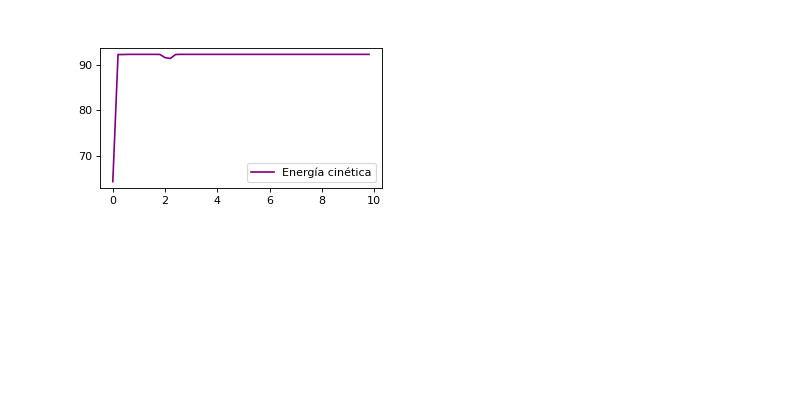

In [431]:
fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(221)
ax5.plot(t1,Energy_K,label='Energía cinética', color='purple')
ax5.legend()

No se conserva la energía cinética, ya que hay una fuerza elástica que reduce la velocidad de las esferas cuando chocan entre sí, sin aumentar la velocidad de estas mismas en un instante de tiempo, es decir, disminuye la energía cinética de una esfera sin que aumente en otra.

$e)$ Grafique la energía potencial total en función del tiempo. ¿Qué significa que el potencial sea positivo?

In [432]:
Potential = Particles[0].GetPotentialEnergy(scale)/2
for i in range(1,len(Particles)):
    Potential = np.add(Potential, Particles[i].GetPotentialEnergy(scale)/2)

<IPython.core.display.Javascript object>


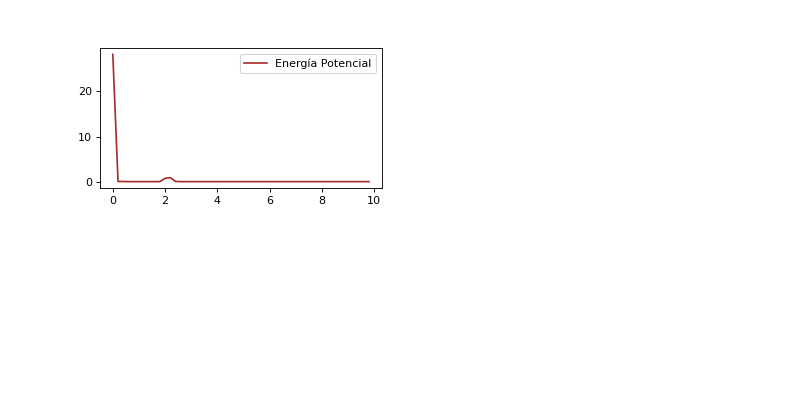

In [433]:
fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(221)
ax6.plot(t1,Potential,label='Energía Potencial', color='brown')
ax6.legend()

No implica nada que sea positiva la energía potencial, ya que esta solo nos indica la diferencia entre dos puntos arbitrarios. Pues si se tomara como cero la energía máxima y la mínima sea negativa, no implicaría que hay menos energía.

$f)$ Grafique la energía mecánica total en función del tiempo. ¿Se conserva? Explique a nivel físico y a nivel nodel método de euler.

<IPython.core.display.Javascript object>


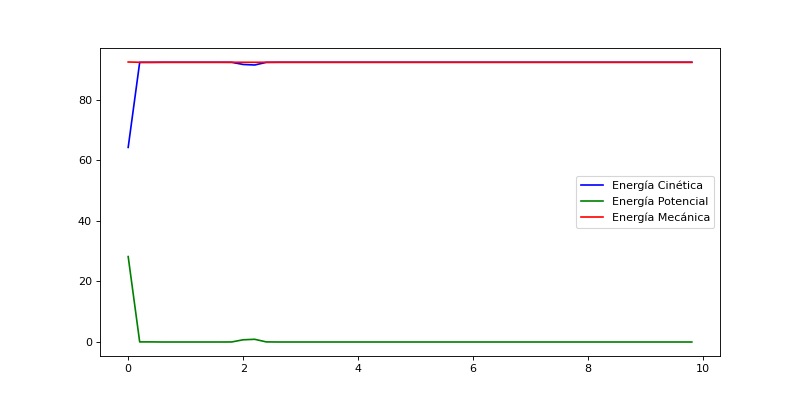

In [434]:
fig7 = plt.figure(figsize=(10,5))
ax7 = fig7.add_subplot(111)
ax7.plot(t1,Energy_K,label='Energía Cinética', color='blue')
ax7.plot(t1,Potential, label='Energía Potencial', color='green')
ax7.plot(t1,Potential+Energy_K,label='Energía Mecánica', color='red')
ax7.legend()

A nivel físico, si se conserva la energía ya que no hay fuerzas que disipen la energía en forma de calor, como la fricción. Sin embargo, a nivel método de euler, no se conserva del todo, ya que toma aproximaciones con diferencias finitas para calcular la posición, velocidad y aceleración, ergo, las energías y las fuerzas. 

$g)$ ¿Se cumple el teorema del trabajo y la energía en su simulación? Argumente.

No se cumple, ya que por los motivos anteriores, la energía mecánica en el método de Euler en la simulación no se conserva, además, las fuerzas son conservativas, por lo tanto, si la energía mecánica no se conserva, el teorema del trabajo y la energía no se cumple.

$h)$ Calcule y grafique el momento angular en el eje z ($L_z$). ¿Se conserva?

In [435]:
AngularM = Particles[0].GetAngularMomentum(scale)
for i in range(1,len(Particles)):
    AngularM = np.add(AngularM, Particles[i].GetAngularMomentum(scale))

<IPython.core.display.Javascript object>


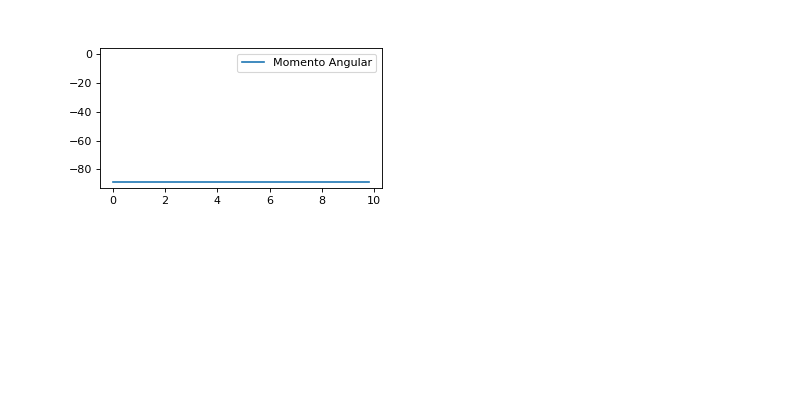

In [436]:
fig8 = plt.figure(figsize=(10,5))
ax8 = fig8.add_subplot(221)
ax8.plot(t1,AngularM[:,0],label='Momento Angular')
ax8.plot(0,0)
ax8.legend()

Si, ya que el momento angular en $z$, depende del momento lineal de las esferas, que sí se conserva, es decir, si se conserva el momento lineal de las esferas, se conserva el momento angular en $z$.

$i)$ Si este sistema que se mueve en 2D se extendiera a 3D, ¿Las partículas se mantendrían
en el mismo plano de movimiento o se moverían en todo el volumen?


Si las partículas tuvieran una componente de velocidad en el eje $z$, no se manetrían en el plano. No obstante, esto no sucede, por lo tanto, apesar de estar en un espacio $3D$, solo se moverían en un plano.